# ReExam 24th of August 2022, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 5 problems each worth 8 points for a total of 40 points, to pass you need
15 points.

## Some general hints and information:
* Some problems are similar to the exam in January but changed.
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam has no anonymous exam ID due to a technical issue, however this does not mean
that the exam is not anonymous. The grading system will automatically download all the exams from Studium
and it is at this stage that they are anonymized by a randomized ID.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.
* I (Benny) will visit the exam room at around 10:30 to see if there are any questions.

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not use encrypted communications
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!


---
## Exam vB, PROBLEM 1
Maximum Points = 8


## Probability warmup
Let's say we have an exam question which consists of $50$ yes/no questions. 
From past performance of similar students, a randomly chosen student will know the correct answer to $N \sim \text{binom}(50,0.8)$ questions. Furthermore, we assume that the student will guess the answer with equal probability to each question they don't know the answer to, i.e. given $N$ we define $Z \sim \text{binom}(50-N,1/2)$ as the number of correctly guessed answers. Define $Y = N + Z$, i.e., $Y$ represents the number of total correct answers.

We are interested in setting a deterministic threshold $T$, i.e., we would pass a student at threshold $T$ if $Y \geq T$. Here $T \in \{0,1,2,\ldots,50\}$.

1. [3p] Produce a simulation of $1000$ students. Hint: Simulate $N$ first then simulate $Y \mid N$ and add the results. Numpy has `numpy.random.binomial` which you can simulate from.
2. [3p] For each threshold $T$, produce a simulation as above and estimate the probability that the student *knows* less than $40$ correct answers given that the student passed, i.e., $N < 40$. Put the answer in `problem11_probabilities` as a list.
3. [2p] What is the smallest value of $T$ such that if $Y \geq T$ then we are 90\% certain that $N \geq 40$?

In [10]:
import numpy as np
N = np.random.binomial(50, 0.8, 1000)
Z = lambda n: np.random.binomial(50-n, 0.5)

results = np.array([])
for n in N:
    results = np.append(results, n + Z(n))

# Part 1:
problem1_1000_samples = results
print(f"Problem 1: {problem1_1000_samples}")

Problem 1: [41. 47. 46. 47. 48. 44. 43. 44. 45. 47. 44. 43. 47. 47. 47. 46. 45. 41.
 46. 47. 44. 46. 41. 41. 43. 45. 46. 43. 41. 43. 44. 46. 47. 47. 45. 46.
 44. 46. 45. 45. 46. 41. 41. 45. 47. 46. 46. 43. 46. 41. 40. 49. 46. 43.
 45. 47. 48. 48. 47. 44. 46. 43. 44. 43. 44. 48. 46. 45. 48. 44. 43. 47.
 46. 43. 43. 48. 45. 42. 46. 47. 42. 41. 44. 46. 46. 44. 46. 44. 43. 42.
 44. 47. 45. 46. 49. 47. 46. 45. 48. 41. 43. 46. 47. 47. 44. 45. 43. 46.
 46. 43. 47. 47. 46. 45. 44. 42. 48. 46. 44. 45. 43. 42. 43. 47. 47. 48.
 44. 48. 42. 48. 48. 46. 43. 45. 46. 41. 47. 46. 43. 47. 46. 43. 41. 47.
 43. 46. 44. 45. 45. 47. 44. 44. 45. 47. 43. 47. 45. 47. 43. 41. 40. 49.
 45. 49. 46. 46. 45. 45. 37. 46. 46. 41. 48. 47. 47. 48. 41. 48. 44. 47.
 47. 47. 47. 45. 46. 46. 43. 44. 48. 46. 44. 46. 49. 44. 46. 46. 49. 46.
 47. 48. 47. 41. 49. 45. 42. 48. 46. 45. 46. 44. 47. 45. 48. 46. 43. 45.
 47. 45. 46. 45. 46. 46. 47. 44. 41. 46. 44. 45. 46. 43. 45. 43. 48. 46.
 48. 48. 42. 44. 43. 45. 44. 47. 43. 48.

In [26]:

# Part 2: 
# replace XXX to represent P(N < 40) for T = [0,1,2,...,50], i.e. your answer should be a list
# of length 51.
results_t = np.array([])
for t in range(51):
    N = np.random.binomial(50, 0.8, 1000)
    Z = lambda n: np.random.binomial(50-n, 0.5)
    res = np.array([[n, n+Z(n)] for n in N])
    #print(res.shape)
    res_passed_and_n_40  = res[(res[:, 0] < 40) & (res[:, 1] >= t)]
    res_passed = res[res[:, 1] >= t]
    #print(res_passed_and_n_40.shape, res_passed.shape)
    results_t = np.append(results_t, res_passed_and_n_40.shape[0]/res_passed.shape[0])
problem1_probabilities = results_t
print(f"Problem 2: {problem1_probabilities}, shape: {problem1_probabilities.shape}")

Problem 2: [0.398      0.436      0.4        0.423      0.419      0.407
 0.412      0.402      0.402      0.418      0.418      0.403
 0.403      0.426      0.436      0.413      0.408      0.401
 0.421      0.391      0.416      0.441      0.437      0.424
 0.43       0.431      0.392      0.427      0.433      0.428
 0.428      0.44       0.421      0.417      0.401      0.416
 0.384      0.3993994  0.433      0.41023069 0.3836858  0.39384615
 0.37048832 0.34364261 0.30357143 0.23763955 0.16091954 0.12867647
 0.06315789 0.02380952 0.2       ], shape: (51,)


In [27]:

# Part 3: Give an integer between 0 and 50 which is the answer to 2.
for t, r in enumerate(problem1_probabilities):
    if 1-r >= 0.90:
        print(f"Problem 3: t: {t}, r: {r}")
        break
problem1_T = t

Problem 3: t: 48, r: 0.06315789473684211


---
## Exam vB, PROBLEM 2
Maximum Points = 8


In many areas of data science and machine learning we need to produce random samples in different ways. This can be done to compute difficult integrals or validate algorithms. 

1. [2p] Produce 1000 samples from the distribution below using inversion sampling
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        \sin(x), & 0 < x < \pi/2 \\
        1, & x \geq \pi/2
    \end{cases}
$$
and show your result with a histogram "You can use sagemath function `histogram`, or `matplotlib.pyplot` `hist`". Also what is the true density? Provide a plot of the true density between 0 and $\pi/2$.

2. [3p] Consider a random variable $X \sim F$ sampled from distribution $F$. Your goal is to estimate $E[X]$. Do this by producing 1000 different experiments, each sampling 1000 samples from $X$ and compute the empirical mean. Provide the $0.025$ and the $0.975$ quantile of the experiments.
3. [3p] Use Hoeffdings inequality to produce a 95% confidence interval for the estimated mean above?

Problem 4: [0.12219062694577947, 0.2551526772791508, 1.1807803382233715, 0.23294833901473924, 0.9275627654029033, 0.1684930101000768, 0.02796219063312067, 0.9181022292771375, 1.3055910490282638, 0.028624336714183556, 0.3563485458894871, 0.6253656378422584, 1.2528901450920298, 0.40674095477312183, 1.0646583170848505, 1.3619726029920272, 0.5061002026509624, 0.2503734987588191, 1.404183010539606, 0.40317100613945256, 1.0003589002934372, 1.273285143955823, 0.43420674263821385, 1.297266749924887, 0.13413099667676623, 1.1303596306549692, 0.8976704466303744, 1.056188193371444, 1.478589596081079, 0.9212693908445184, 0.18258265094191373, 0.47212444915758733, 1.374582467479122, 0.200807022440817, 0.058014666262485935, 1.4305128784453667, 0.9501329141931337, 0.4488269447548138, 1.1755318490536675, 1.1709224661514221, 0.5908708427996882, 1.0515357399669252, 1.030523924376612, 0.7395335226400843, 0.3817893319713448, 0.5809130928139308, 1.0655801960108005, 1.0413038748270644, 0.7638452211477071, 1.2

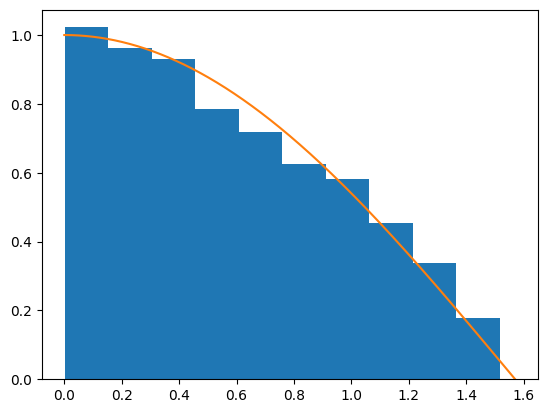

In [37]:
import matplotlib.pyplot as plt
# put your samples in the variable samples
samples = [np.arcsin(i) for i in np.random.uniform(0, 1, 1000)]
print(f"Problem 4: {samples}")
x = np.linspace(0, np.pi/2, 1000)
plt.hist(samples, bins=10, density=True)
plt.plot(x, np.cos(x))

In [55]:
# Produce 1000 experiments, in which each experiment you draw
# 1000 samples from F. Store the value of the empirical mean of each
# experiment and compute the 0.025 and the 0.975 quantiles
samples = np.array([[np.arcsin(i) for i in np.random.uniform(0, 1, 1000)] for _ in range(1000)])
means = np.mean(samples, axis=1) # the computed empirical means, should be a list of length 1000
quantile_0025 = np.quantile(samples, 0.025, axis=1) # the 0.025 quantile
quantile_0975 = np.quantile(samples, 0.975, axis=1) # the 0.975 quantile
print(f"Problem 5: {means.shape}, {quantile_0025.shape}, {quantile_0975.shape}")

Problem 5: (1000,), (1000,), (1000,)


In [56]:
# Put your interval in the form
mean = np.mean(means)
epsilon = (1/np.sqrt(1000))*np.sqrt((1/2)*np.log(2/0.05))
l_edge = mean-epsilon # The left edge of the interval
r_edge = mean+epsilon # The right edge of the interval
print("Confidence interval around the mean is [%.2f,%.2f]" % (l_edge,r_edge))

Confidence interval around the mean is [0.53,0.61]


---
## Exam vB, PROBLEM 3
Maximum Points = 8


## Concentration of measure

As you recall, we said that concentration of measure was simply the phenomenon where we expect that the probability of a large deviation of some quantity becoming smaller as we observe more samples: [8/22 points per correct answer]

1. Which of the following will exponentially concentrate, i.e. for some $C_1,C_2,C_3,C_4 $ 
$$
    P(Z - \mathbb{E}[Z] \geq \epsilon) \leq C_1 e^{-C_2 n \epsilon^2} \wedge C_3 e^{-C_4 n (\epsilon+1)} \enspace .
$$

    1. The empirical mean of i.i.d. sub-Gaussian random variables?
    2. The empirical mean of i.i.d. sub-Exponential random variables?
    3. The empirical mean of i.i.d. bounded random variables?
    4. The empirical variance of i.i.d. bounded random variables?
    5. The empirical mean of i.i.d. random variables with finite variance?
    6. The empirical variance of i.i.d. random variables with finite variance?
    7. The empirical variance of i.i.d. sub-Gaussian random variables?
    8. The empirical third moment of i.i.d. bounded random variables?
    9. The empirical fourth moment of i.i.d. sub-Gaussian random variables?
    10. The empirical mean of i.i.d. deterministic random variables?
    11. The empirical tenth moment of i.i.d. Bernoulli random variables?

2. Which of the above will concentrate in the weaker sense, that for some $C_1$
$$
    P(Z - \mathbb{E}[Z] \geq \epsilon) \leq \frac{C_1}{n \epsilon^2}?
$$

In [ ]:

# Answers to part 1, which of the alternatives exponentially concentrate, answer as a list
# i.e. [1,4,5] that is example 1, 4, and 5 concentrate
problem3_answer_1 = [XXX]

In [ ]:

# Answers to part 2, which of the alternatives concentrate in the weaker sense, answer as a list
# i.e. [1,4,5] that is example 1, 4, and 5 concentrate
problem3_answer_2 = [XXX]

---
## Exam vB, PROBLEM 4
Maximum Points = 8


In this problem you will be working with a text file `a_sequence.txt`, found in the `data` folder. This contains a sequence of numbers that are observations of a Markov chain. The goal of this exercise is to analyze this sequence in different ways.

1. [2p] Take the file `a_sequence.txt` and load it as a list of integers. Use bash or something to figure out how to parse the file.
2. [2p] Define a Markov chain from this list of integers
    1. What are the states?
    2. How many states are there?
3. [2p] Estimate the transition probability of going from state 42 to state 16?
4. [2p] Find the transition matrix $P$ and compute the matrix power $P^{10} v$ where $v = (1,0,\ldots,0)$.

In [ ]:

# Read the file a_sequence.txt and load it as a list of integers. 
# Put your result in the variable "numbers"

numbers = XXX

In [ ]:

# Construct a Markov chain of this list of integers, that is. 
# EXPLAIN in text what are the states are and what 
# the transition probabilities mean.

#---------Put your explanation between the lines-------------

#------------------------------------------------------------

In [ ]:
# put the number of states in the variable n_states

n_states = XXX

# Now fill in the states, stored as a sorted list of integers
states = XXX

In [ ]:
# Estimate the transition probability of going from $42$ to $16$. 
# You can use the below function if you want

In [ ]:
def makeFreqDict(myDataSeq, one = int(1)):
    '''Make a frequency mapping out of a sequence of data - list, array, str.

    Param myDataList, a list of data.
    Return a dictionary mapping each unique data value to its frequency count.'''

    freqDict = {} # start with an empty dictionary

    for res in myDataSeq:

        if res in freqDict: # the data value already exists as a key
                freqDict[res] = freqDict[res] + one #int(1) # add 1 to the count
        else: # the data value does not exist as a key value
            # add a new key-value pair for this new data value, frequency 1
            freqDict[res] = one

    return freqDict # return the dictionary created

In [ ]:
# Put your answer here for the transition probability

transition_probability = XXX

In [ ]:
# Fill in the transition matrix P as a numpy array of 
# shape (n_states x n_states)
# Make sure it is a transition matrix by checking the column sum
P =XXX

# If our initial vector is
v = np.zeros(n_states)
v[0] = 1

# What is P^10 v
steady_state_v = XXX

---
## Exam vB, PROBLEM 5
Maximum Points = 8


## SMS spam filtering [8p]

In the following problem we will explore SMS spam texts. The dataset is the `SMS Spam Collection Dataset` and we have provided for you a way to load the data. If you run the appropriate cell below, the result will be in the `spam_no_spam` variable. The result is a `list` of `tuples` with the first position in the tuple being the SMS text and the second being a flag `0 = not spam` and `1 = spam`.

1. [3p] Let $X$ be the random variable that represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. (This is precision)
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.
2. [3p] Estimate the probability that the word "free" or "prize" is in the text given that it is spam. (This is recall) I.e. estimate
$$
    \mathbb{P}(\text{"free" or "prize" is in } X \mid Y = 1) \enspace .
$$
3. [2p] Provide a "90\%" interval of confidence around the true probability from **part 1**. I.e. use the Hoeffding inequality to obtain for your estimate $\hat P$. Find $l > 0$ such that the following holds:
$$
    \mathbb{P}(\hat P - l \leq \mathbb{E}[\hat P] \leq \hat P + l) \geq 0.9 \enspace .
$$

In [ ]:

# Run this cell to get the SMS text data
from exam_extras import load_sms
spam_no_spam = load_sms()

In [ ]:

# fill in the estimate for part 1 here (should be a number between 0 and 1)
problem5_hatP = XXX

In [ ]:

# fill in the estimate for hatP for the double free question in part 2 here (should be a number between 0 and 1)
problem5_hatP2 = XXX

In [ ]:

# fill in the calculated l from part 3 here
problem5_l = XXX